In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def hconcat_resize(img_list,
                   interpolation
                   = cv2.INTER_CUBIC):
      # take minimum heights
    h_min = min(img.shape[0]
                for img in img_list)

    # image resizing
    im_list_resize = [cv2.resize(img,
                       (int(img.shape[1] * h_min / img.shape[0]),
                        h_min), interpolation
                                 = interpolation)
                      for img in img_list]

    # return final image
    return cv2.hconcat(im_list_resize)

# Perspective Transformation Example - 1

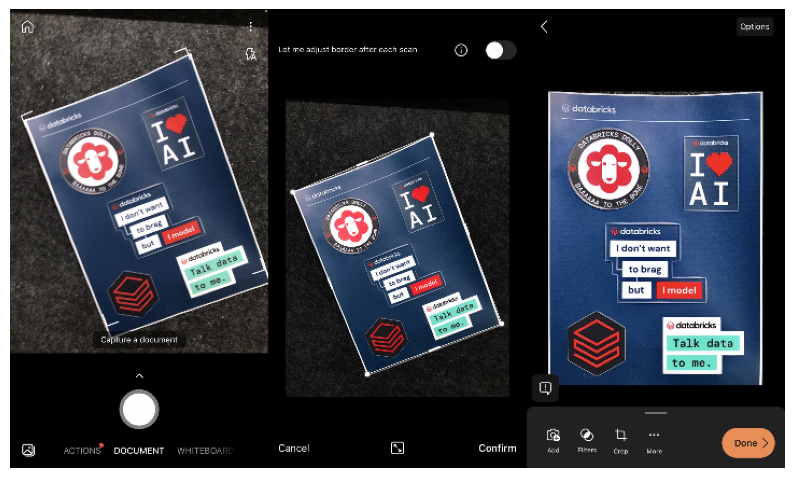

In [3]:
img1 = cv2.imread("Homography/ms_lens_1.jpg")
img2 = cv2.imread("Homography/ms_lens_2.jpg")
img3 = cv2.imread("Homography/ms_lens_3.jpg")

concat_imgs = hconcat_resize([img1, img2, img3])

apr = 720 / concat_imgs.shape[1]
dim = (720, int(concat_imgs.shape[0] * apr))
concat_imgs = cv2.resize(concat_imgs, dim,cv2.INTER_CUBIC)

# Convert BGR (OpenCV) → RGB (Matplotlib)
concat_imgs_rgb = cv2.cvtColor(concat_imgs, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(concat_imgs_rgb)
plt.axis("off")
plt.show()

## Get 4 corners

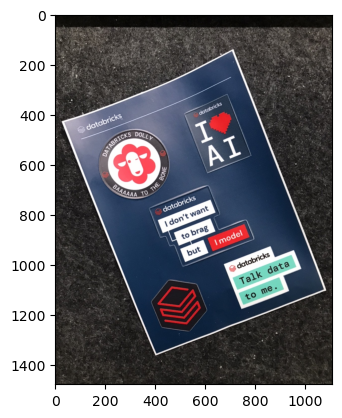

In [4]:
image_path = "./Homography/databricks.jpg"
image = cv2.imread(image_path)
fig = plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [6]:
fig.canvas.mpl_disconnect(cid)

In [7]:
# blank_img = np.zeros((640,480,3), dtype=np.uint8)
# src_corners = np.float32([[262, 420], [853, 372], [238, 1275], [949, 1263]])
src_corners = np.float32([[30, 423], [712, 144], [406, 1367], [1081, 1103]])
dst_corners = np.float32([[0, 0], [480,0], [0, 640], [480, 640]]) # 640 x 480

M = cv2.getPerspectiveTransform(src_corners,dst_corners)
warped_img = cv2.warpPerspective(image, M, (480,640))


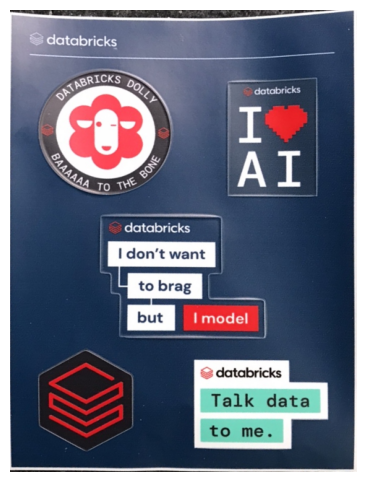

In [8]:
warped_img_rgb = cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(warped_img_rgb)
plt.axis("off")
plt.show()

# Perspective Transformation Example -2

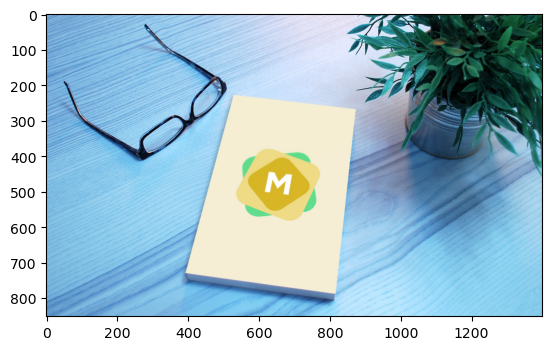

In [9]:
image_path = "./Homography/desk-perspective.png"
image = cv2.imread(image_path)
fig = plt.figure()
plt.imshow(image)

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [10]:
fig.canvas.mpl_disconnect(cid)

In [11]:
persp_img = cv2.imread("./Homography/desk-perspective.png")
norm_img = cv2.imread("./Homography/desk-normal.png")

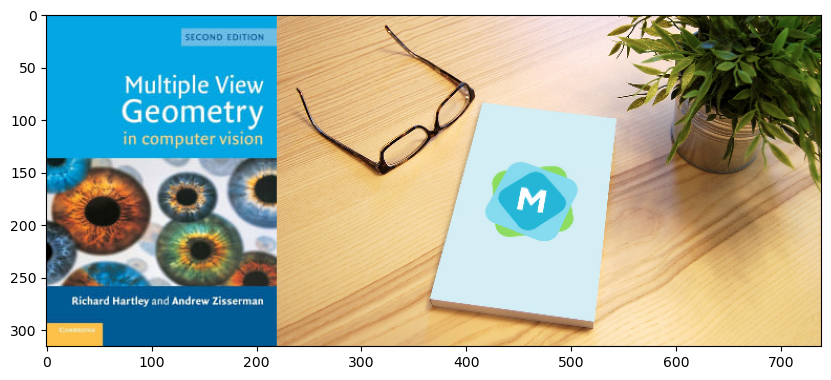

In [12]:
two_imgs = hconcat_resize([norm_img, persp_img])
two_imgs_rgb = cv2.cvtColor(two_imgs, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(two_imgs_rgb)
plt.show()

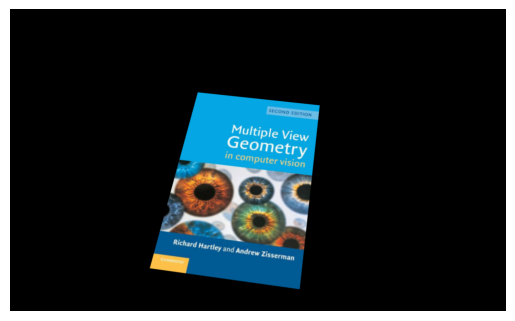

In [13]:
# Define the corners of the perspective image where the normal image will be overlayed
# You need to define these corners manually or using some annotation tool
corners_perspective = np.array([[530.14, 235.25], [874.5, 271.95], [818.04, 791.30], [394.66, 732.03]], dtype=np.float32)

# Define the corners of the normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)
# Warp the normal image to the perspective image using the homography
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))
fig = plt.figure()
plt.imshow(cv2.cvtColor(warped_normal_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

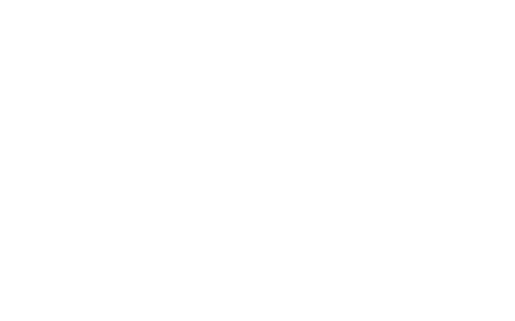

In [14]:
# Create a mask for the overlay
overlay_mask = np.ones_like(persp_img, dtype=np.uint8) * 255
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
cv2.fillConvexPoly(overlay_mask, corners_perspective.astype(np.int32), (0, 0, 0))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

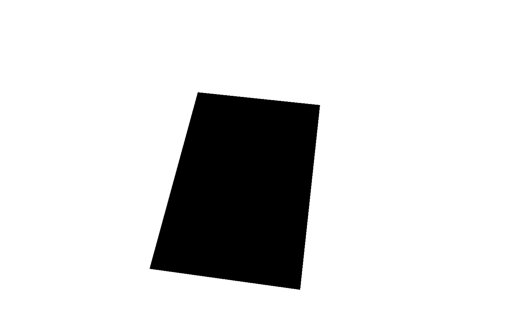

In [16]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
# Overlay the warped normal image onto the perspective image
overlaid_image = persp_img.copy()
overlaid_image[overlay_mask == 0] = warped_normal_image[overlay_mask == 0]

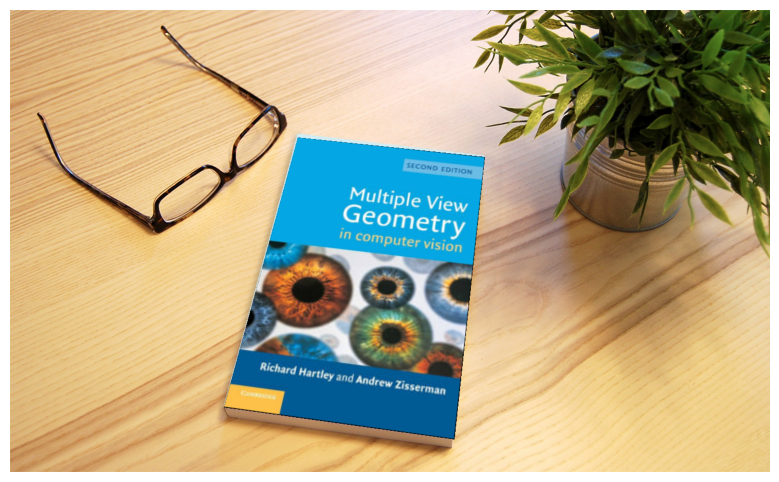

In [18]:
overlaid_image_rgb = cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(overlaid_image_rgb)
plt.axis("off")
plt.show()

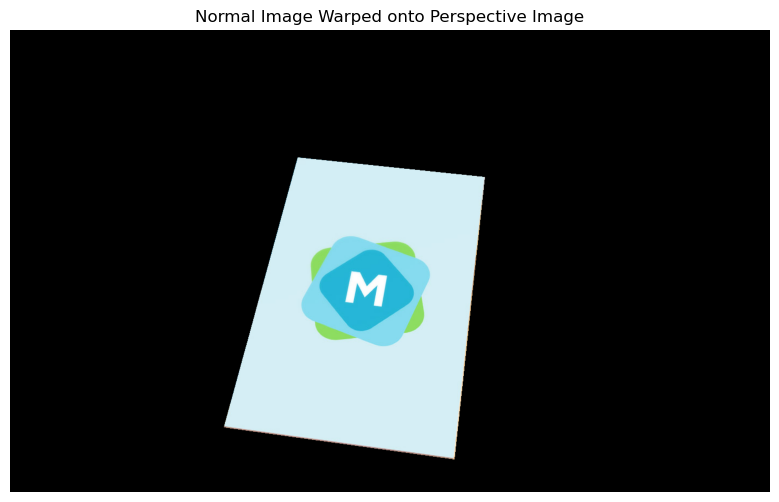

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load Images
# -----------------------------
persp_img = cv2.imread("Homography/desk-perspective.png")  # Angled desk image
norm_img = cv2.imread("Homography/desk-normal.png")       # Flat image to overlay

# Safety check
if persp_img is None or norm_img is None:
    raise FileNotFoundError("Check your image paths. One or both images not found.")

# Convert perspective image to RGB for Matplotlib display
persp_img_rgb = cv2.cvtColor(persp_img, cv2.COLOR_BGR2RGB)

# -----------------------------
# 2️⃣ Define Points
# -----------------------------
# Corners on perspective image (desk corners)
corners_perspective = np.array([
    [530.14, 235.25],  # top-left
    [874.5, 271.95],   # top-right
    [818.04, 791.30],  # bottom-right
    [394.66, 732.03]   # bottom-left
], dtype=np.float32)

# Corners of the normal image (full rectangle)
h, w = norm_img.shape[:2]
corners_normal = np.array([
    [0, 0],    # top-left
    [w, 0],    # top-right
    [w, h],    # bottom-right
    [0, h]     # bottom-left
], dtype=np.float32)

# -----------------------------
# 3️⃣ Compute Homography
# -----------------------------
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)

# -----------------------------
# 4️⃣ Warp Normal Image
# -----------------------------
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

# -----------------------------
# 5️⃣ Create Mask for Overlay
# -----------------------------
# Start with white mask
overlay_mask = np.ones_like(persp_img, dtype=np.uint8) * 255

# Fill the desk polygon with black (area to replace)
cv2.fillConvexPoly(overlay_mask, corners_perspective.astype(np.int32), (0, 0, 0))

# Invert mask to keep background
mask_inv = cv2.bitwise_not(overlay_mask)

# Keep background from perspective image
persp_background = cv2.bitwise_and(persp_img, mask_inv)

# Keep warped normal image in the polygon area
normal_foreground = cv2.bitwise_and(warped_normal_image, overlay_mask)

# Combine both
overlaid_image = cv2.add(persp_background, normal_foreground)

# -----------------------------
# 6️⃣ Display Result
# -----------------------------
overlaid_image_rgb = cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(overlaid_image_rgb)
plt.axis("off")
plt.title("Normal Image Warped onto Perspective Image")
plt.show()


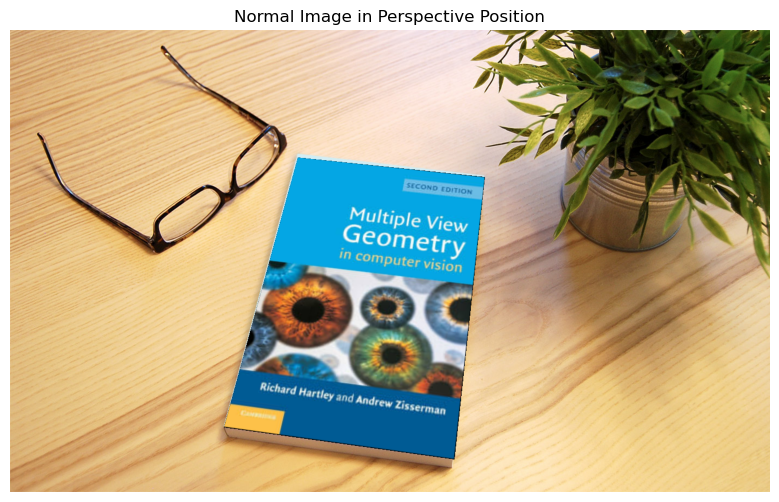

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load Images
# -----------------------------
persp_img = cv2.imread("Homography/desk-perspective.png")  # Angled desk image
norm_img = cv2.imread("Homography/desk-normal.png")       # Flat image to overlay

if persp_img is None or norm_img is None:
    raise FileNotFoundError("Check your image paths. One or both images not found.")

# -----------------------------
# 2️⃣ Define Points
# -----------------------------
# Corners on perspective image (area to replace)
corners_perspective = np.array([
    [530.14, 235.25],  # top-left
    [874.5, 271.95],   # top-right
    [818.04, 791.30],  # bottom-right
    [394.66, 732.03]   # bottom-left
], dtype=np.float32)

# Corners of normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([
    [0, 0], [w, 0], [w, h], [0, h]
], dtype=np.float32)

# -----------------------------
# 3️⃣ Compute Homography & Warp
# -----------------------------
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

# -----------------------------
# 4️⃣ Create Mask for the Area
# -----------------------------
mask = np.zeros((persp_img.shape[0], persp_img.shape[1]), dtype=np.uint8)  # single channel mask
cv2.fillConvexPoly(mask, corners_perspective.astype(np.int32), 255)  # white area = where normal image will appear

mask_inv = cv2.bitwise_not(mask)  # invert mask for background

# -----------------------------
# 5️⃣ Combine Images
# -----------------------------
# Keep perspective image where normal image will not go
persp_background = cv2.bitwise_and(persp_img, persp_img, mask=mask_inv)

# Keep warped normal image where the mask is
normal_foreground = cv2.bitwise_and(warped_normal_image, warped_normal_image, mask=mask)

# Combine both
final_image = cv2.add(persp_background, normal_foreground)

# -----------------------------
# 6️⃣ Display Result
# -----------------------------
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(final_image_rgb)
plt.axis('off')
plt.title("Normal Image in Perspective Position")
plt.show()


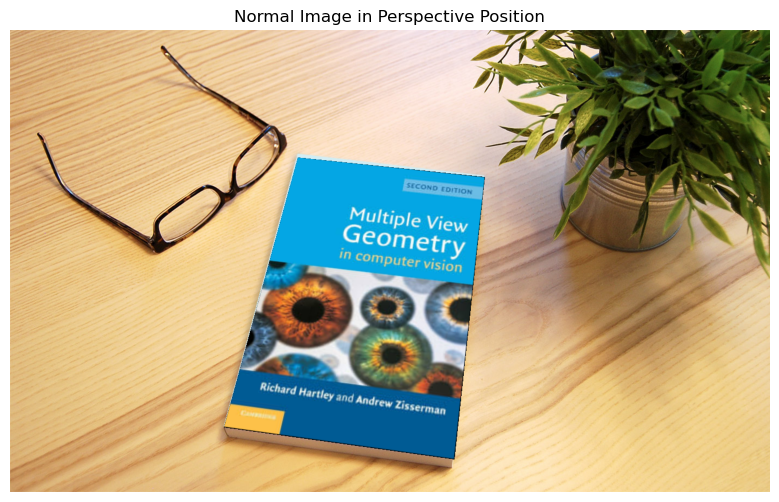

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️Load Images
# -----------------------------
persp_img = cv2.imread("Homography/desk-perspective.png")  # Angled desk image
norm_img = cv2.imread("Homography/desk-normal.png")       # Flat image to overlay

if persp_img is None or norm_img is None:
    raise FileNotFoundError("Check your image paths. One or both images not found.")

# -----------------------------
# 2️ Define Points
# -----------------------------
# Corners on perspective image (The area where normal image will replace)
corners_perspective = np.array([
    [530.14, 235.25],  # top-left
    [874.5, 271.95],   # top-right
    [818.04, 791.30],  # bottom-right
    [394.66, 732.03]   # bottom-left
], dtype=np.float32)

# Corners of normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# -----------------------------
# 3️ Compute Homography & Warp
# -----------------------------
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

# -----------------------------
# 4️Create Mask for the Area
# -----------------------------
mask = np.zeros((persp_img.shape[0], persp_img.shape[1]), dtype=np.uint8)  # single channel mask
cv2.fillConvexPoly(mask, corners_perspective.astype(np.int32), 255)  # white area = where normal image will appear

mask_inv = cv2.bitwise_not(mask)  # invert mask for background

# -----------------------------
# 5️Combine Images
# -----------------------------
# Keep perspective image where normal image will not go
persp_background = cv2.bitwise_and(persp_img, persp_img, mask=mask_inv)

# Keep warped normal image where the mask is
normal_foreground = cv2.bitwise_and(warped_normal_image, warped_normal_image, mask=mask)

# Combine both
final_image = cv2.add(persp_background, normal_foreground)

# -----------------------------
# 6️Display Result
# -----------------------------
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(final_image_rgb)
plt.axis('off')
plt.title("Normal Image in Perspective Position")
plt.show()


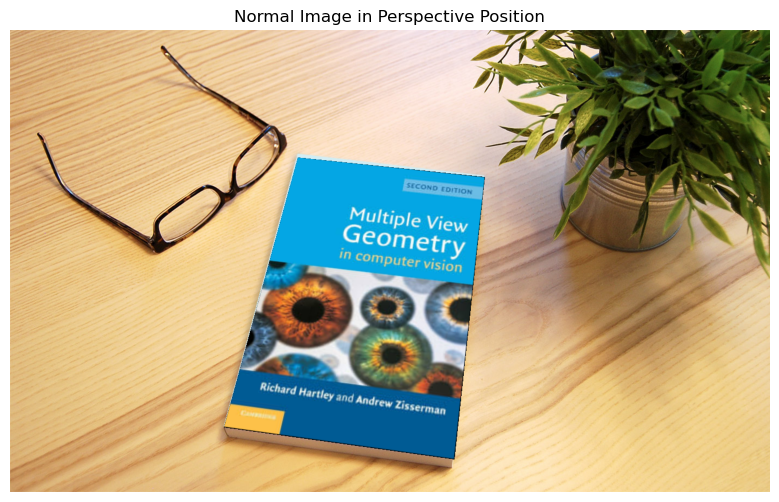

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load Images
# -----------------------------
persp_img = cv2.imread("Homography/desk-perspective.png")  # Angled desk image
norm_img = cv2.imread("Homography/desk-normal.png")       # Flat image to overlay

if persp_img is None or norm_img is None:
    raise FileNotFoundError("Check your image paths. One or both images not found.")

# -----------------------------
# 2️⃣ Define Points
# -----------------------------
# Corners on perspective image (The area where normal image will replace)
corners_perspective = np.array([
    [530.14, 235.25],  # top-left
    [874.5, 271.95],   # top-right
    [818.04, 791.30],  # bottom-right
    [394.66, 732.03]   # bottom-left
], dtype=np.float32)

# Corners of normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([
    [0, 0], [w, 0], [w, h], [0, h]
], dtype=np.float32)

# -----------------------------
# 3️⃣ Compute Homography & Warp
# -----------------------------
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

# -----------------------------
# 4️⃣ Create Mask for the Area
# -----------------------------
mask = np.zeros((persp_img.shape[0], persp_img.shape[1]), dtype=np.uint8)  # single channel mask
cv2.fillConvexPoly(mask, corners_perspective.astype(np.int32), 255)  # white area = where normal image will appear
mask_inv = cv2.bitwise_not(mask)  # invert mask for background

# -----------------------------
# 5️⃣ Combine Images
# -----------------------------
# Keep perspective image where normal image will not go
persp_background = cv2.bitwise_and(persp_img, persp_img, mask=mask_inv)
# Keep warped normal image where the mask is
normal_foreground = cv2.bitwise_and(warped_normal_image, warped_normal_image, mask=mask)
# Combine both
final_image = cv2.add(persp_background, normal_foreground)

# -----------------------------
# 6️⃣ Display Result
# -----------------------------
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(final_image_rgb)
plt.axis('off')
plt.title("Normal Image in Perspective Position")
plt.show()


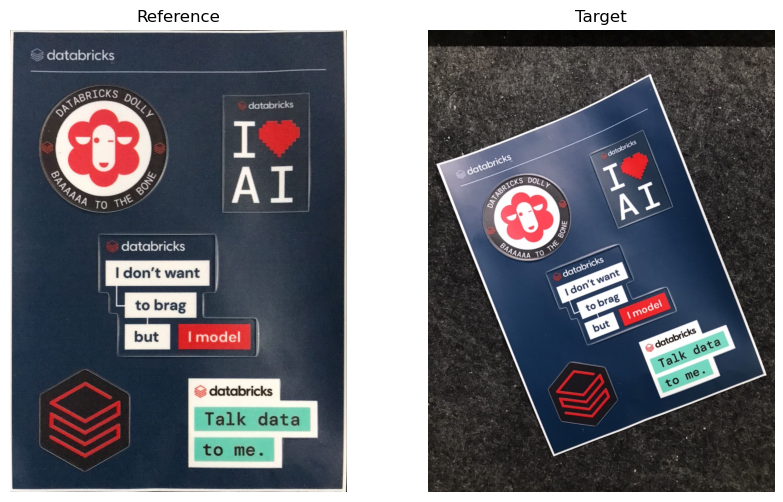

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️ Load Images
# -----------------------------
ref_image_path = 'Homography/refDatabricks.jpg'
target_image_path = 'Homography/databricks.jpg'

ref_img = cv.imread(ref_image_path)
target_img = cv.imread(target_image_path)

# Check images
assert ref_img is not None, f"Image at {ref_image_path} not found"
assert target_img is not None, f"Image at {target_image_path} not found"

# Convert BGR to RGB for Matplotlib display
ref_img_rgb = cv.cvtColor(ref_img, cv.COLOR_BGR2RGB)
target_img_rgb = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)

# Display original images
plt.figure(figsize=[10,6])
plt.subplot(121); plt.imshow(ref_img_rgb); plt.axis('off'); plt.title("Reference")
plt.subplot(122); plt.imshow(target_img_rgb); plt.axis('off'); plt.title("Target")
plt.show()


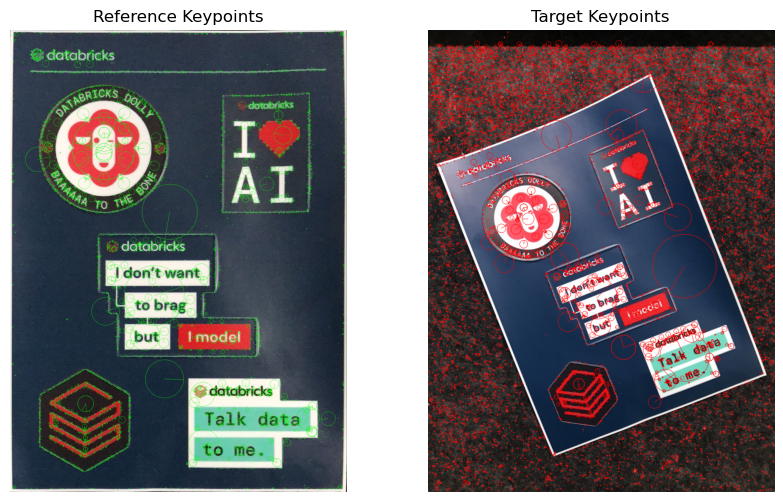

In [24]:
# -----------------------------
# 2️⃣ Convert to Grayscale
# -----------------------------
ref_gray = cv.cvtColor(ref_img, cv.COLOR_BGR2GRAY)
target_gray = cv.cvtColor(target_img, cv.COLOR_BGR2GRAY)

# -----------------------------
# 3️⃣ Initialize SIFT and Detect Keypoints
# -----------------------------
sift = cv.SIFT_create()
kp_ref, des_ref = sift.detectAndCompute(ref_gray, None)
kp_target, des_target = sift.detectAndCompute(target_gray, None)

# -----------------------------
# 4️⃣ Visualize Keypoints
# -----------------------------
ref_kp_img = cv.drawKeypoints(ref_img_rgb, kp_ref, outImage=np.array([]), color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
target_kp_img = cv.drawKeypoints(target_img_rgb, kp_target, outImage=np.array([]), color=(255,0,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[10,6])
plt.subplot(121); plt.imshow(ref_kp_img); plt.axis('off'); plt.title("Reference Keypoints")
plt.subplot(122); plt.imshow(target_kp_img); plt.axis('off'); plt.title("Target Keypoints")
plt.show()


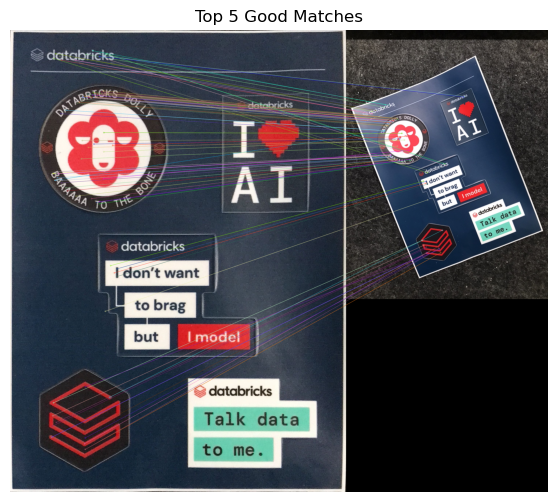

Match 1:
 Reference keypoint:
  x, y: (228.32388305664062, 2236.783447265625)
  size: 16.62125015258789
  angle: 110.45856475830078
 Descriptor vector (128-d): [ 21.   0.   0.  39. 141.   0.   0.   7. 141.   0.   0.   4.  32.   1.
   0.  72.  75.   0.   0.  33. 141.   1.   0.  27.   1.   0.   0.  11.
  92.   6.   2.   1.  28.   1.   0.  40. 141.   0.   0.   5. 141.  23.
   5.  15.  28.   0.   0.  42.  60.   7.   5. 112. 141.   0.   0.   9.
   3.   2.   1.  27.  75.   1.   0.   1.  12.   6.   1.  53. 141.   0.
   0.   1.  95. 111.  60.  27.  11.   0.   0.   1.  10.  23.  65. 141.
  66.   0.   0.   0.   3.   0.   1.  15.  25.   4.   1.   8.   0.   1.
   7.  65.  30.   0.   1.   1.   0.  11.  17.   4.   3.   1.  12.   7.
   0.   2.  16.  16.   1.   1.  36.  15.   1.   0.   1.   2.   0.   0.
  36.  44.]
 Target keypoint:
  x, y: (441.1144104003906, 1224.57763671875)
  size: 6.841651439666748
  angle: 91.84828186035156
 Descriptor vector (128-d): [ 32.   0.   0.  30. 150.   0.   0.   5. 150

In [25]:
# -----------------------------
# 5️⃣ Feature Matching (BFMatcher + Lowe's Ratio Test)
# -----------------------------
bf = cv.BFMatcher()
matches = bf.knnMatch(des_ref, des_target, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append([m])

# -----------------------------
# 6️⃣ Draw Top 5 Matches
# -----------------------------
top_matches = good_matches[:100]  # Take only the first 5 matches
matches_img = cv.drawMatchesKnn(
    ref_img_rgb, kp_ref,
    target_img_rgb, kp_target,
    top_matches, None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=[12,6])
plt.imshow(matches_img)
plt.axis('off')
plt.title(f"Top 5 Good Matches")
plt.show()

# -----------------------------
# 7️⃣ Inspect Top 5 Good Match Descriptors
# -----------------------------
for i, match in enumerate(top_matches):
    m = match[0]
    print(f"Match {i+1}:")
    print(" Reference keypoint:")
    print("  x, y:", kp_ref[m.queryIdx].pt)
    print("  size:", kp_ref[m.queryIdx].size)
    print("  angle:", kp_ref[m.queryIdx].angle)
    print(" Descriptor vector (128-d):", des_ref[m.queryIdx])
    print(" Target keypoint:")
    print("  x, y:", kp_target[m.trainIdx].pt)
    print("  size:", kp_target[m.trainIdx].size)
    print("  angle:", kp_target[m.trainIdx].angle)
    print(" Descriptor vector (128-d):", des_target[m.trainIdx])
    print("-"*50)
